In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [54]:
#Imported the csv file and turned it into a dataframe

In [55]:
videogame_sales = pd.read_csv("../data/videogamesales.csv", sep= "," )

In [26]:
#Removed the unwanted columns

In [56]:
videogame_sales.drop('JP_Sales', inplace=True, axis=1)

In [57]:
videogame_sales.drop('Other_Sales', inplace=True, axis=1)

In [58]:
videogame_sales.drop('Genre', inplace=True, axis=1)

In [59]:
videogame_sales.drop('Rank', inplace=True, axis=1)

In [60]:
videogame_sales.drop('NA_Sales', inplace=True, axis=1)

In [61]:
videogame_sales.drop('Publisher', inplace=True, axis=1)

In [62]:
videogame_sales

,Name,Platform,Year,EU_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,29.02,82.74
1,Super Mario Bros.,NES,1985.0,3.58,40.24
2,Mario Kart Wii,Wii,2008.0,12.88,35.82
3,Wii Sports Resort,Wii,2009.0,11.01,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,8.89,31.37
...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,0.00,0.01
16596,Know How 2,DS,2010.0,0.01,0.01


In [34]:
#Searched for the nan values and removed them

In [63]:
videogame_sales.sort_values(by=['Year'], inplace=True)
videogame_sales.tail(5)

,Name,Platform,Year,EU_Sales,Global_Sales
16307,Freaky Flyers,GC,NaN,0.00,0.01
16327,Inversion,PC,NaN,0.00,0.01
16366,Hakuouki: Shinsengumi Kitan,PS3,NaN,0.00,0.01
16427,Virtua Quest,GC,NaN,0.00,0.01
16493,The Smurfs,3DS,NaN,0.01,0.01


In [64]:
videogame_sales['Year'].isnull().sum()

271

In [65]:
videogame_sales.dropna(subset = ["Year"], inplace=True)

In [66]:
videogame_sales.tail(10)

,Name,Platform,Year,EU_Sales,Global_Sales
9438,Attack on Titan (KOEI),PSV,2016.0,0.00,0.13
13614,Utawarerumono: Futari no Hakuoro,PS4,2016.0,0.00,0.04
15714,This War of Mine,PS4,2016.0,0.01,0.02
15716,Nil Admirari no Tenbin: Teito Genwaku Toukidan,PSV,2016.0,0.00,0.02
1727,Ratchet & Clank (2016),PS4,2016.0,0.64,1.17
4820,EA Sports UFC 2,XOne,2016.0,0.14,0.40
16241,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,0.00,0.01
16438,Brothers Conflict: Precious Baby,PSV,2017.0,0.00,0.01
14390,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,0.00,0.03
5957,Imagine: Makeup Artist,DS,2020.0,0.00,0.29


In [39]:
#Wanted to group the data, but didnt really know if it was going to be easier through platform or publisher, so I checked how many unique entrances each column had

In [67]:
print(videogame_sales['Platform'].nunique())
videogame_sales['Publisher'].nunique()

31


KeyError: 'Publisher'

In [68]:
videogame_sales.sort_values(by=['Platform'], inplace=True)
videogame_sales

,Name,Platform,Year,EU_Sales,Global_Sales
6896,Checkers,2600,1980.0,0.01,0.24
3966,Chopper Command,2600,1982.0,0.03,0.50
5395,Bank Heist,2600,1982.0,0.02,0.34
1817,Moon Patrol,2600,1982.0,0.06,1.12
1163,Mario Bros.,2600,1982.0,0.09,1.59
...,...,...,...,...,...
10814,ReCore,XOne,2016.0,0.03,0.10
1543,Assassin's Creed Syndicate,XOne,2015.0,0.56,1.28
7832,Farming Simulator 2015,XOne,2015.0,0.07,0.19
11803,Resident Evil Zero,XOne,2016.0,0.02,0.07


In [145]:
#Once I figured out which column I wanted (Platform), I checked the names of the different entrances

In [69]:
videogame_sales["Platform"].unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [147]:
#Made 3 lists which contained the 3 most recognisable gaming consoles, and left out the unwanted data

In [70]:
x_box1 = ['XB', 'X360', "XOne"]
play_station1 = ["PS", 'PS2', 'PS3', "PS4", "PSP", "PSV"]
nintendo1 = ["NES", "SNES", "N64", "GBA", "GB", "Wii", "WiiU", "DS", "3DS"]

In [149]:
#Used the lists to make a function that gave me 3 different dataframes with the information of the consoles I wanted
#Then sorted the data in ascending order by Year
#Started to create plots

In [ ]:
#XBox

In [71]:
x_box_sales = videogame_sales[videogame_sales['Platform'].apply(lambda x: any([y in x for y in x_box1]))]

In [72]:
x_box_sales=x_box_sales.sort_values("Year", ascending=True)
x_box_sales

,Name,Platform,Year,EU_Sales,Global_Sales
2083,NFL Fever 2002,XB,2000.0,0.21,0.99
129,Halo: Combat Evolved,XB,2001.0,1.30,6.43
2909,Star Wars: Obi-Wan,XB,2001.0,0.16,0.70
8043,AirForce Delta Storm,XB,2001.0,0.04,0.18
5478,NASCAR Thunder 2002,XB,2001.0,0.07,0.33
...,...,...,...,...,...
16276,Assetto Corsa,XOne,2016.0,0.01,0.01
6157,Naruto Shippuden: Ultimate Ninja Storm 4,XOne,2016.0,0.06,0.28
11803,Resident Evil Zero,XOne,2016.0,0.02,0.07
13950,Resident Evil 6,XOne,2016.0,0.00,0.04


In [73]:
eu_x_box_sales= x_box_sales.groupby('Year')['EU_Sales'].sum() 

Text(0.5, 1.0, 'XBOX VIDEOGAME SALES EU')

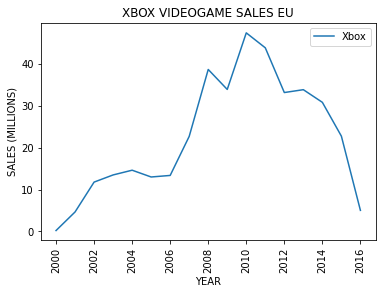

In [48]:
def x_box_vg_sales()    
    plt.plot(eu_x_box_sales)
    plt.xticks(rotation='vertical')
    plt.legend(["Xbox"])
    plt.xlabel("YEAR")
    plt.ylabel("SALES (MILLIONS)")
    plt.title("XBOX VIDEOGAME SALES EU")

<AxesSubplot:xlabel='Year'>

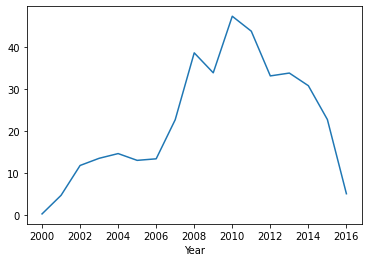

In [198]:
eu_x_box_sales.plot()

In [153]:
x_box_sales["EU_Sales"].sum()

383.31

In [117]:
x_box_sales["Global_Sales"].sum()

1362.7599999999998

In [ ]:
#PlayStation

In [74]:
play_station_sales = videogame_sales[videogame_sales['Platform'].apply(lambda x: any([y in x for y in play_station1]))]

In [75]:
play_station_sales=play_station_sales.sort_values("Year", ascending=True)
play_station_sales

,Name,Platform,Year,EU_Sales,Global_Sales
5533,Parodius,PS,1994.0,0.00,0.33
3505,Theme Park,PS,1994.0,0.16,0.57
11439,King's Field (Japan),PS,1994.0,0.00,0.08
6641,A. IV Evolution: A Ressha de Ikou 4,PS,1994.0,0.00,0.25
4388,NHL FaceOff,PS,1994.0,0.17,0.45
...,...,...,...,...,...
8657,Yakuza Kiwami,PS4,2016.0,0.00,0.16
15508,Hakuoki: Shinkai - Hana no Shou,PSV,2016.0,0.00,0.02
14390,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,0.00,0.03
16241,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,0.00,0.01


<AxesSubplot:xlabel='Year'>

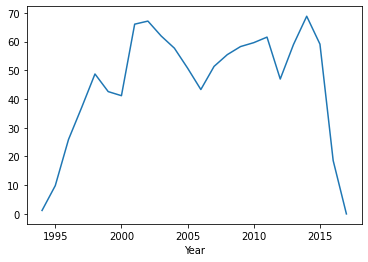

In [76]:
eu_play_station_sales=play_station_sales.groupby('Year')['EU_Sales'].sum()
eu_play_station_sales.plot()

In [119]:
play_station_sales["Global_Sales"].sum()

3541.6400000000003

In [ ]:
#Nintendo

In [77]:
nintendo_sales = videogame_sales[videogame_sales['Platform'].apply(lambda x: any([y in x for y in nintendo1]))]

In [78]:
nintendo_sales= nintendo_sales.sort_values("Year", ascending=True)
nintendo_sales

,Name,Platform,Year,EU_Sales,Global_Sales
421,Baseball,NES,1983.0,0.10,3.20
763,Mahjong,NES,1983.0,0.00,2.14
1861,Popeye,NES,1983.0,0.12,1.10
1809,Donkey Kong,NES,1983.0,0.05,1.13
700,Mario Bros.,NES,1983.0,0.12,2.28
...,...,...,...,...,...
14301,Metroid Prime: Federation Force,3DS,2016.0,0.01,0.03
12683,Sumikko Gurashi: Mura o Tsukurundesu,3DS,2016.0,0.00,0.06
14306,Sonic Boom: Fire & Ice,3DS,2016.0,0.00,0.03
9909,Etrian Odyssey V,3DS,2016.0,0.00,0.12


<AxesSubplot:xlabel='Year'>

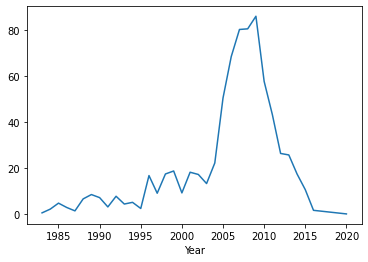

In [79]:
eu_nintendo_sales=nintendo_sales.groupby('Year')['EU_Sales'].sum() 
eu_nintendo_sales.plot()

In [69]:
nintendo_sales["Global_Sales"].sum()

3322.47

In [ ]:
#Put the three plots together

Text(0.5, 1.0, 'VIDEOGAME SALES EU')

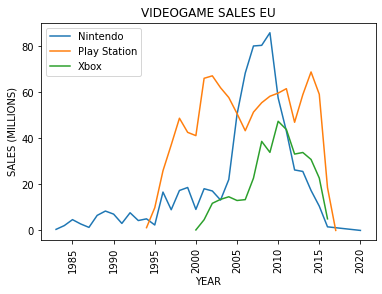

In [217]:
def video_game_sales_eu()
    plt.plot(eu_nintendo_sales)
    plt.plot(eu_play_station_sales)
    plt.plot(eu_x_box_sales)
    plt.xticks(rotation='vertical')
    plt.legend(["Nintendo", "Play Station", "Xbox"])
    plt.xlabel("YEAR")
    plt.ylabel("SALES (MILLIONS)")
    plt.title("VIDEOGAME SALES EU")
    return plt.show()
    

In [ ]:
#Making a piechart of the market share each cosole has with regards to video game sales in the EU since they began selling

In [80]:
sum_nintendo_sales_eu=nintendo_sales["EU_Sales"].sum()
sum_play_station_sales_eu=play_station_sales["EU_Sales"].sum()
sum_x_box_sales_eu=x_box_sales["EU_Sales"].sum()

In [81]:
print(sum_nintendo_sales_eu)
print(sum_play_station_sales_eu)
print(sum_x_box_sales_eu)

744.27
1092.61
383.31


In [82]:
total_sum = sum_nintendo_sales_eu + sum_play_station_sales_eu + sum_x_box_sales_eu

In [83]:
nintendo_percentage=sum_nintendo_sales_eu/total_sum
play_station_percentage=sum_play_station_sales_eu/total_sum
x_box_percentage=sum_x_box_sales_eu/total_sum

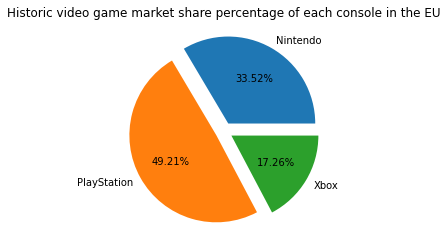

In [84]:
def eu_console_marketshare():
    Consoles=["Nintendo", "PlayStation", "Xbox"] 
    Sales=[nintendo_percentage*100, play_station_percentage*100, x_box_percentage*100]
    plt.pie(Sales, labels= Consoles,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
    plt.title("Historic video game market share percentage of each console in the EU")
    return plt.show()
eu_console_marketshare()

In [ ]:
#Making three histograms

(array([3., 5., 2., 4., 3.]),
 array([ 0.21 ,  9.652, 19.094, 28.536, 37.978, 47.42 ]),
 <BarContainer object of 5 artists>)

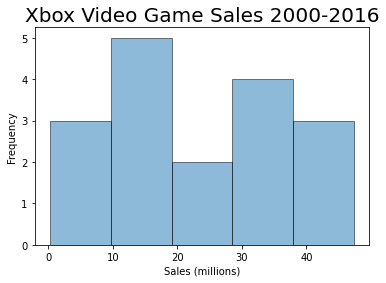

In [85]:
def histogram_xbox():
    x = eu_x_box_sales
    bins = 5
    plt.title('Xbox Video Game Sales 2000-2016',fontsize=20)
    plt.xlabel('Sales (millions)')
    plt.ylabel('Frequency',fontsize=10)
    plt.hist(x, bins, alpha=0.5, histtype='bar', ec='black')

(array([ 3.,  2.,  2.,  6., 11.]),
 array([ 0.  , 13.77, 27.54, 41.31, 55.08, 68.85]),
 <BarContainer object of 5 artists>)

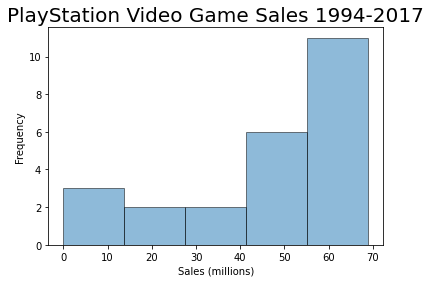

In [86]:
def histogram_play_station():
    x = eu_play_station_sales
    bins = 5
    plt.title('PlayStation Video Game Sales 1994-2017',fontsize=20)
    plt.xlabel('Sales (millions)')
    plt.ylabel('Frequency',fontsize=10)
    plt.hist(x, bins, alpha=0.5, histtype='bar', ec='black')

(array([21.,  7.,  2.,  2.,  3.]),
 array([ 0.   , 17.176, 34.352, 51.528, 68.704, 85.88 ]),
 <BarContainer object of 5 artists>)

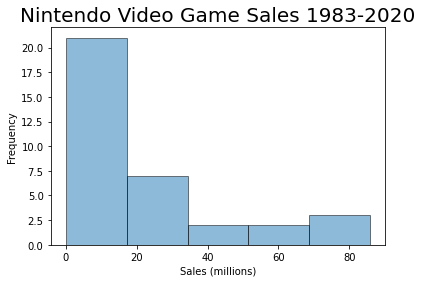

In [87]:
def histogram_nintendo():    
    x = eu_nintendo_sales
    bins = 5
    plt.title('Nintendo Video Game Sales 1983-2020',fontsize=20)
    plt.xlabel('Sales (millions)')
    plt.ylabel('Frequency',fontsize=10)
    plt.hist(x, bins, alpha=0.5, histtype='bar', ec='black')

In [ ]:
#Making a correlation matrix 

In [88]:
nintendo_sales= nintendo_sales.sort_values("Year", ascending=True)
nintendo_sales

,Name,Platform,Year,EU_Sales,Global_Sales
421,Baseball,NES,1983.0,0.10,3.20
763,Mahjong,NES,1983.0,0.00,2.14
1861,Popeye,NES,1983.0,0.12,1.10
1809,Donkey Kong,NES,1983.0,0.05,1.13
700,Mario Bros.,NES,1983.0,0.12,2.28
...,...,...,...,...,...
2242,Pokken Tournament,WiiU,2016.0,0.22,0.93
13981,Doraemon: Shin Nobita no Nihon Tanjou,3DS,2016.0,0.00,0.04
7672,Puzzle & Dragons X: God Chapter / Dragon Chapter,3DS,2016.0,0.00,0.20
16252,The Book of Unwritten Tales 2,WiiU,2016.0,0.01,0.01


Text(0.5, 1.0, 'Correlation Matrix Nintendo')

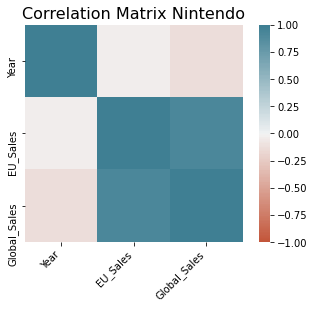

In [93]:
def correlation_matrix_nintendo():
    corr = nintendo_sales.corr()
    ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title('Correlation Matrix Nintendo', fontsize=16)

In [ ]:
#Making a new plots with sliced dataframes

In [111]:
videogame_sales_2008_2017=videogame_sales.sort_values("Year", ascending=True)

In [100]:
videogame_sales_2008_2017

,Name,Platform,Year,EU_Sales,Global_Sales
6896,Checkers,2600,1980.0,0.01,0.24
4025,Ice Hockey,2600,1980.0,0.03,0.49
258,Asteroids,2600,1980.0,0.26,4.31
544,Missile Command,2600,1980.0,0.17,2.76
6317,Bridge,2600,1980.0,0.02,0.27
...,...,...,...,...,...
14306,Sonic Boom: Fire & Ice,3DS,2016.0,0.00,0.03
14390,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,0.00,0.03
16241,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,0.00,0.01
16438,Brothers Conflict: Precious Baby,PSV,2017.0,0.00,0.01


In [112]:
videogame_sales_2008_2017=videogame_sales_2008_2017.set_index("Year")

In [103]:
videogame_sales_2008_2017

,Name,Platform,EU_Sales,Global_Sales
Year,,,,
1980.0,Checkers,2600,0.01,0.24
1980.0,Ice Hockey,2600,0.03,0.49
1980.0,Asteroids,2600,0.26,4.31
1980.0,Missile Command,2600,0.17,2.76
1980.0,Bridge,2600,0.02,0.27
...,...,...,...,...
2016.0,Sonic Boom: Fire & Ice,3DS,0.00,0.03
2017.0,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,0.00,0.03
2017.0,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,0.00,0.01


In [113]:
videogame_sales_2008_2017=videogame_sales_2008_2017.loc[2008.0:2017.0]